<a href="https://colab.research.google.com/github/zhuoyingcai/NYC-Housing-Prices-Analysis/blob/master/NYC_Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Section

In [2]:
import os
import requests

# Data
import numpy as np
import pandas as pd

from scipy import stats

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
!pip install geopandas
import geopandas as gpd

import json

     |████████████████████████████████| 901kB 3.4MB/s 
     |████████████████████████████████| 17.9MB 45.1MB/s 
     |████████████████████████████████| 10.8MB 43.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


# Path Functions

In [0]:
def ensure_dir(path_to_dir):
  try:
      os.makedirs(path_to_dir)
  except FileExistsError:
      # directory already exists
      pass

# Config

In [4]:
# path config
annualizedSalesUpdate_data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/annualizedSalesUpdate'
data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/data/'

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# make sure dir exist
ensure_dir(data_dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Load and summarize data

In [0]:
# define dataframe
df = pd.DataFrame()

In [0]:
years = [2017, 2018]
boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']

# load data
for year in years:
  for borough in boroughs:
    path = annualizedSalesUpdate_data_dir + '/%s_%s.xls' % (year, borough)
    data = pd.read_excel(path, header=4)
    df = df.append(data, sort=False)

We first visually inspect the data to see if there is any missing data or incorrect data types. Also, we may want to edit data entry.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170407 entries, 0 to 8385
Data columns (total 21 columns):
BOROUGH                           170407 non-null int64
NEIGHBORHOOD                      170407 non-null object
BUILDING CLASS CATEGORY           170407 non-null object
TAX CLASS AT PRESENT              170349 non-null object
BLOCK                             170407 non-null int64
LOT                               170407 non-null int64
EASE-MENT                         88660 non-null object
BUILDING CLASS AT PRESENT         170349 non-null object
ADDRESS                           170407 non-null object
APARTMENT NUMBER                  106536 non-null object
ZIP CODE                          170393 non-null float64
RESIDENTIAL UNITS                 170349 non-null float64
COMMERCIAL UNITS                  170349 non-null float64
TOTAL UNITS                       170349 non-null float64
LAND SQUARE FEET                  170346 non-null float64
GROSS SQUARE FEET                 1

In [8]:
df.head(10)

BOROUGH NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
5        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
6        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
7        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
8        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
9        2     BATHGATE  01 ONE FAMILY DWELLINGS                       

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                    1   3028   25                                  A5   
1                    1   3030   55                                  A5   
2                    1   3030   56                                  A1   
3                    1   3030   56                                  A1   
4                    1   3030   65                                  A1   
5                    1   3030   70                                  A1   
6                    1   3036   13                                  A1   
7                    1   3037   42                                  A1   
8                    1   3037  101                                  S0   
9                    1   3043   55                                  A1   

                 ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
0    412 EAST 179 STREET                   ...                1.0   
1  410 EAST 182ND STREET                   ...                1.0   
2    412 EAST 182 STREET                   ...                1.0   
3    412 EAST 182 STREET                   ...                1.0   
4       4455 PARK AVENUE                   ...                1.0   
5       4445 PARK AVENUE                   ...                1.0   
6       4348 PARK AVENUE                   ...                1.0   
7       4428 PARK AVENUE                   ...                1.0   
8    443 EAST 180 STREET                   ...                1.0   
9   1948 BATHGATE AVENUE                   ...                1.0   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0               0.0          1.0            1842.0             2048.0   
1               0.0          1.0            1330.0             1460.0   
2               0.0          1.0            1306.0             1440.0   
3               0.0          1.0            1306.0             1440.0   
4               0.0          1.0            1622.0             1587.0   
5               0.0          1.0            1694.0             1497.0   
6               0.0          1.0            3525.0             1764.0   
7               0.0          1.0            3525.0             1340.0   
8               2.0          3.0            1293.0             2820.0   
9               0.0          1.0            2356.0             2047.0   

   YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0      1901.0                          1                              A5   
1      1899.0                          1                              A5   
2      1899.0                          1                              A1   
3      1899.0                          1                              A1   
4      1899.0                          1                              A1   
5      1899.0                          1                              A1   
6      1899.0                          1                              A1   
7      1899.0                          1                              A1   
8      1952.0                          1                              S0   
9      1901.0                          1                              A

In [9]:
df.tail()

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
8381        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
8382        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
8383        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
8384        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
8385        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   

      BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT            ADDRESS  \
8381   7094   61       NaN                        V0  23 WILTSHIRE LANE   
8382   7267  289       NaN                        A5      41 JADE COURT   
8383   7267  298       NaN                        A5      11 JADE COURT   
8384   7267  299       NaN                        A5       9 JADE COURT   
8385   7346    1       NaN                        V0      GAYNOR STREET   

     APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
8381              NaN  ...                0.0               0.0          0.0   
8382              NaN  ...                1.0               0.0          1.0   
8383              NaN  ...                1.0               0.0          1.0   
8384              NaN  ...                1.0               0.0          1.0   
8385              NaN  ...                0.0               0.0          0.0   

      LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
8381            4427.0                0.0      2018.0   
8382            2955.0             2612.0      2018.0   
8383            4108.0             2612.0      2018.0   
8384           11019.0             2612.0      2018.0   
8385           42016.0                0.0         0.0   

      TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE SALE PRICE  \
8381                          1                              V0     793216   
8382                          1                              V0     671026   
8383                          1                              V0     610950   
8384                          1                              V0     672043   
8385                          1                              V0          0   

      SALE DATE  
8381 2018-05-25  
8382 2018-10-04  
8383 2018-07-23  
8384 2018-08-07  
8385 2018-09-21  

[5 rows x 21 columns]

# 2. Data Cleaning

---

We found two problems:

 1. we see that the dataframe has 170407 entries, but TAX CLASS AT PRESENT, EASE-MENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET and YEAR BUILT has less entries.
 
 2. The BROUGH is represented as numerical values rather than categorical.
 
 3. There are some data does not make sense, such as ZIP CODE, GROSS SQUARE FEET, YEAR BUILT and SALE PRICE can not be 0.


---


 What we are going to do next:
 
 1. rename BOROUGH values to actual borough name.
 
 2. drop columns that we are not going to use.
 
 3. remove raws with null or 0  ZIP CODE, SALE PRICE, GROSS SQUARE FEET, LAND SQUARE FEET and YEAR BUILT.
 
 4. standard data clean process to clean duplicate raws,  raws with Nah value.

---



In [0]:
df['BOROUGH'] = df['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

In [0]:
df = df.drop(['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
         'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE' ], axis=1)

In [0]:
df = df[df['SALE PRICE'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[df['YEAR BUILT'] != 0]
df = df[df['ZIP CODE'] != 0]

In [0]:
df = df.drop_duplicates(keep='last')
df = df.dropna()

In [14]:
df = df.astype({"ZIP CODE": int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64142 entries, 1 to 8384
Data columns (total 14 columns):
BOROUGH                      64142 non-null object
NEIGHBORHOOD                 64142 non-null object
BLOCK                        64142 non-null int64
LOT                          64142 non-null int64
ZIP CODE                     64142 non-null int64
RESIDENTIAL UNITS            64142 non-null float64
COMMERCIAL UNITS             64142 non-null float64
TOTAL UNITS                  64142 non-null float64
LAND SQUARE FEET             64142 non-null float64
GROSS SQUARE FEET            64142 non-null float64
YEAR BUILT                   64142 non-null float64
TAX CLASS AT TIME OF SALE    64142 non-null int64
SALE PRICE                   64142 non-null int64
SALE DATE                    64142 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 7.3+ MB


## 2.1 Outlier
We also want to look at the distribution of our SALE PRICE.

1. We noticed that there are some extremely expensive house located in Manhattan, we would like to look at it and decide whether include them in our project or not.

2. The documentation of this data set explained there will be $0 sales price which means that there was a transfer of ownership without a cash consideration. However, there are some other values indicate there was a transfer of ownership which is not in the consideration of our project.

In [15]:
df['SALE PRICE'].value_counts(dropna=False).head(10)

10        1267
600000     643
550000     610
650000     608
700000     591
800000     568
450000     561
750000     540
400000     535
500000     528
Name: SALE PRICE, dtype: int64

In [16]:
df.nlargest(10, 'SALE PRICE')

BOROUGH             NEIGHBORHOOD  BLOCK  LOT  ZIP CODE  \
773    Manhattan                  CHELSEA    713    1     10011   
7347   Manhattan              MIDTOWN CBD   1301    1     10167   
2572   Manhattan                FINANCIAL     40    3     10005   
14970  Manhattan  UPPER WEST SIDE (59-79)   1119   61     10023   
771    Manhattan                  CHELSEA    673    1     10001   
20902   Brooklyn             SPRING CREEK   4435    1     11239   
1755   Manhattan                  FASHION    840   42     10018   
8602   Manhattan             MIDTOWN WEST   1000    1     10036   
6795   Manhattan              MIDTOWN CBD   1298   23     10017   
2570   Manhattan                FINANCIAL     29    1     10004   

       RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
773                  0.0             167.0        167.0          165200.0   
7347                 0.0              35.0         35.0           81336.0   
2572                 0.0               1.0          1.0           53632.0   
14970                0.0               1.0          1.0           15059.0   
771                  0.0              42.0         42.0          136000.0   
20902             1092.0               0.0       1092.0          358496.0   
1755                 0.0               4.0          4.0           51271.0   
8602                 0.0               4.0          4.0           16066.0   
6795                 0.0              42.0         42.0           35145.0   
2570                 0.0               1.0          1.0           42762.0   

       GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  SALE PRICE  \
773            1100533.0      1905.0                          4  2397501899   
7347           1586886.0      1966.0                          4  2210000000   
2572           1617206.0      1987.0                          4  1040000000   
14970            99769.0      1978.0                          4   980000000   
771            1129200.0      1912.0                          4   880000000   
20902           997720.0      1971.0                          2   869612895   
1755            697029.0      1920.0                          4   850000000   
8602            369864.0      1909.0                          4   719099999   
6795            627691.0      1987.0                          4   701000000   
2570            993569.0      1983.0                          4   652000000   

       SALE DATE  
773   2018-03-20  
7347  2017-05-05  
2572  2017-01-24  
14970 2018-06-15  
771   2018-10-23  
20902 2018-05-04  
1755  2019-02-08  
8602  2018-04-27  
6795  2018-10-30  
2570  2017-05-24

In [17]:
lst = df['SALE PRICE'].unique().tolist()
lst = np.sort(lst, axis = None)
lst[:100]

array([    1,     2,     3,     4,     5,     6,    10,    15,    20,
          60,   100,   125,   200,   210,   396,   416,   500,   700,
         825,  1000,  1006,  1041,  1162,  1500,  1787,  1800,  1895,
        2000,  2352,  2416,  2500,  2567,  3000,  3317,  3500,  3582,
        3750,  3774,  3900,  3937,  4000,  4500,  4700,  4800,  4900,
        4997,  5000,  5041,  5100,  5200,  5300,  5500,  5700,  5750,
        6000,  6081,  6250,  6270,  6300,  6400,  6438,  6500,  6533,
        6562,  6650,  7000,  7500,  7923,  7980,  8000,  8250,  8500,
        9500,  9686,  9828, 10000, 10001, 10050, 10500, 11000, 11500,
       11666, 12000, 12497, 12500, 12678, 12950, 13333, 13864, 13870,
       14583, 14915, 15000, 15238, 15387, 15523, 15567, 16000, 16500,
       16544])

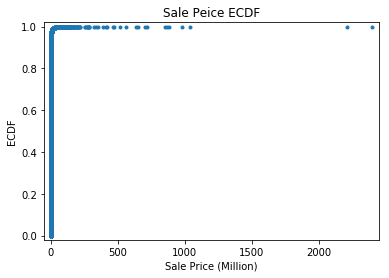

In [18]:
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

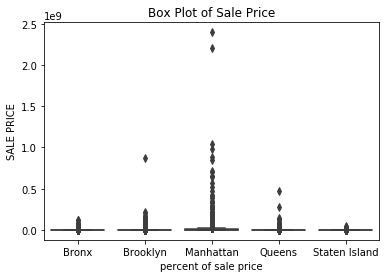

In [19]:
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('percent of sale price')
plt.show()

## 2.2 Cut Unreal Price

From the above data, we conclude that:

1. We think the price of the most expensive buildings is reasonable. The average price for each units is not unacceptable. Hoever, We decided not to keep those data because those value is extremly large and way too far from the mean. We will set a maximum price range for the data.

2. There are a lot of extremely low sale price which indicates that there was a transfer of ownership. In order to solve this problem, we decided to set a minimum price range for the data.

---

We set price range from ten thousands up to three millions. Houses in this price is what we can accept and would like to purchase it.

In [0]:
# set max price to be 10000000
df = df[(df['SALE PRICE'] < 3000000)]
# set min price to be 50000
df = df[(df['SALE PRICE'] > 100000)]

# 3. Data Visualization

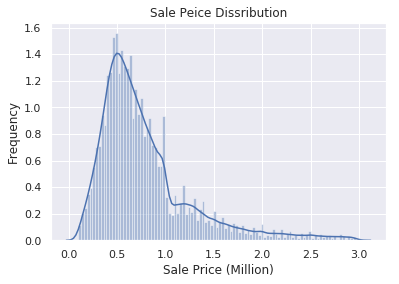

In [21]:
sns.set()
_ = sns.distplot(df['SALE PRICE']/1000000, bins=100)
plt.title('Sale Peice Dissribution')
plt.xlabel('Sale Price (Million)')
plt.ylabel('Frequency')
plt.show()

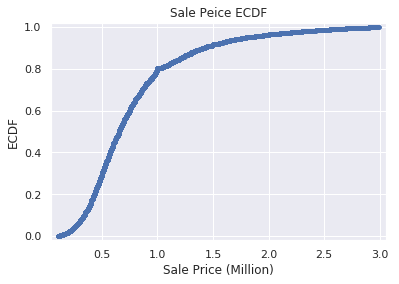

In [22]:
# make Empirical cumulative distribution function (ECDF)
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

From above graph, we notice that most of the houses were trading between 0.5 million to 1 moillion. In addition, there is a peak in 1 million which mean house with sale price of 1 million is also very popular.

---

As we know, the hoursing price are has a huge different in different borough. We plot the two more graph in order to see the how the horsing price realted to borough. We can conclude that:

1. Most of the housing prices are below one milion. 

2. The housing price in Manhattan is the most diverse. However, The Bronx and Staten Island rarely have housing prices for over one milion.

3. Ordering by turnover rate, Manhattan >> Brooklyn > Queen > Bronx > Staten Island.

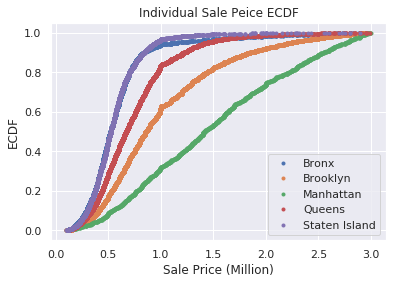

In [23]:
# gets borough list
boroughs = df['BOROUGH'].unique().tolist()
df_index = df.set_index('BOROUGH', drop=False)

# draw ECDFs
for borough in boroughs:
  x = np.sort(df_index.loc[borough]['SALE PRICE']/1000000)
  y = np.arange(1, len(x)+1) / len(x)
  _ = plt.plot(x, y, marker='.', linestyle='none')

plt.legend(boroughs)
_ = plt.title('Individual Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.show()

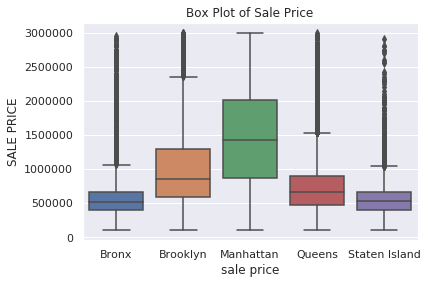

In [24]:
# shows the average price in each boroughs
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('sale price')
plt.show()

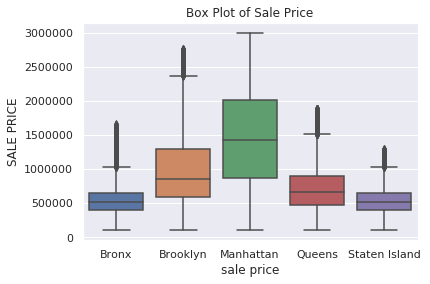

In [25]:
# separate data by borough
df_Bronx = df_index.loc['Bronx']
df_Brooklyn = df_index.loc['Brooklyn']
df_Manhattan = df_index.loc['Manhattan']
df_Queens = df_index.loc['Queens']
df_StatenIsland = df_index.loc['Staten Island']

# compute z score of each borough
z_Bronx = np.abs(stats.zscore(df_Bronx['SALE PRICE']))
z_Brooklyn = np.abs(stats.zscore(df_Brooklyn['SALE PRICE']))
z_Manhattan = np.abs(stats.zscore(df_Manhattan['SALE PRICE']))
z_Queens = np.abs(stats.zscore(df_Queens['SALE PRICE']))
z_StatenIsland = np.abs(stats.zscore(df_StatenIsland['SALE PRICE']))

# remove outliers
threshold = 3

df_Bronx = df_Bronx[(z_Bronx < threshold)]
df_Brooklyn = df_Brooklyn[(z_Brooklyn < threshold)]
df_Manhattan = df_Manhattan[(z_Manhattan < threshold)]
df_Queens = df_Queens[(z_Queens < threshold)]
df_StatenIsland = df_StatenIsland[(z_StatenIsland < threshold)]

# box plot
df = pd.DataFrame()

df = df.append(df_Bronx, sort=False)
df = df.append(df_Brooklyn, sort=False)
df = df.append(df_Manhattan, sort=False)
df = df.append(df_Queens, sort=False)
df = df.append(df_StatenIsland, sort=False)

_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('sale price')
plt.show()

# How were the hoursing prices chaged among the five boroughs over the past two years?

---

Formula for Z score = (Observation — Mean)/Standard Deviation

In [26]:
url = "http://data.beta.nyc//dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/6df127b1-6d04-4bb7-b983-07402a2c3f90/download/f4129d9aa6dd4281bc98d0f701629b76nyczipcodetabulationareas.geojson"
gdf = gpd.read_file(url)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
OBJECTID      262 non-null int64
postalCode    262 non-null object
PO_NAME       262 non-null object
STATE         262 non-null object
borough       262 non-null object
ST_FIPS       262 non-null object
CTY_FIPS      262 non-null object
BLDGpostal    262 non-null int64
@id           262 non-null object
longitude     262 non-null float64
latitude      262 non-null float64
geometry      262 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 24.6+ KB


In [0]:
# ZIP Code Definitions of New York City Neighborhoods
# Bronx 
Central_Bronx = [10453, 10457, 10460]
Bronx_Park_Fordham = [10458, 10467, 10468]
High_Bridge_Morrisania = [10451, 10452, 10456]
Hunts_Point_Mott_Haven = [10454, 10455, 10459, 10474]
Kingsbridge_Riverdale = [10463, 10471]
Northeast_Bronx = [10466, 10469, 10470, 10475]
Southeast_Bronx = [10461, 10462,10464, 10465, 10472, 10473]

# Brooklyn
Central_Brooklyn = [11212, 11213, 11216, 11233, 11238]
Southwest_Brooklyn = [11209, 11214, 11228]
Borough_Park = [11204, 11218, 11219, 11230]
Canarsie_Flatlands = [11234, 11236, 11239]
Southern_Brooklyn = [11223, 11224, 11229, 11235]
Northwest_Brooklyn = [11201, 11205, 11215, 11217, 11231]
Flatbush = [11203, 11210, 11225, 11226]
EastNY_New_Lots = [11207, 11208]
Greenpoint = [11211, 11222]
Sunset_Park = [11220, 11232]
Bushwick_Williamsburg = [11206, 11221, 11237]

# Manhattan
Central_Harlem = [10026, 10027, 10030, 10037, 10039]
Chelsea_Clinton =	[10001, 10011, 10018, 10019, 10020, 10036]
East_Harlem	= [10029, 10035]
Gramercy_Park_Murray_Hill =	[10010, 10016, 10017, 10022]
Greenwich_Village_Soho = [10012, 10013, 10014]
Lower_Manhattan =	[10004, 10005, 10006, 10007, 10038, 10280]
Lower_East = [10002, 10003, 10009]
Upper_East = [10021, 10028, 10044, 10065, 10075, 10128]
Upper_West = [10023, 10024, 10025]
Inwood_Washington_Heights =	[10031, 10032, 10033, 10034, 10040]

# Queens
Northeast_Queens = [11361, 11362, 11363, 11364]
North_Queens = [11354, 11355, 11356, 11357, 11358, 11359, 11360]
Central_Queens = [11365, 11366, 11367]
Jamaica	= [11412, 11423, 11432, 11433, 11434, 11435, 11436]
Northwest_Queens = [11101, 11102, 11103, 11104, 11105, 11106]
West_Central_Queens = [11374, 11375, 11379, 11385]
Rockaways = [11691, 11692, 11693, 11694, 11695, 11697]
Southeast_Queens = [11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429]
Southwest_Queens = [11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421]
West_Queens = [11368, 11369, 11370, 11372, 11373, 11377, 11378]

# Staten Island
Port_Richmond =	[10302, 10303, 10310]
South_Shore = [10306, 10307, 10308, 10309, 10312]
Stapleton_StGeorge = [10301, 10304, 10305]
Mid_Island = [10314]

In [0]:
# Bronx
BX1 = df.loc[df['ZIP CODE'].isin(Central_Bronx)]
BX2 = df.loc[df['ZIP CODE'].isin(Bronx_Park_Fordham)]
BX3 = df.loc[df['ZIP CODE'].isin(High_Bridge_Morrisania)]
BX4 = df.loc[df['ZIP CODE'].isin(Hunts_Point_Mott_Haven)]
BX5 = df.loc[df['ZIP CODE'].isin(Kingsbridge_Riverdale)]
BX6 = df.loc[df['ZIP CODE'].isin(Northeast_Bronx)]
BX7 = df.loc[df['ZIP CODE'].isin(Southeast_Bronx)]

# Brooklyn
BK1 = df.loc[df['ZIP CODE'].isin(Central_Brooklyn)]
BK2 = df.loc[df['ZIP CODE'].isin(Southwest_Brooklyn)]
BK3 = df.loc[df['ZIP CODE'].isin(Borough_Park)]
BK4 = df.loc[df['ZIP CODE'].isin(Canarsie_Flatlands)]
BK5 = df.loc[df['ZIP CODE'].isin(Southern_Brooklyn)]
BK6 = df.loc[df['ZIP CODE'].isin(Northwest_Brooklyn)]
BK7 = df.loc[df['ZIP CODE'].isin(Flatbush)]
BK8 = df.loc[df['ZIP CODE'].isin(EastNY_New_Lots)]
BK9 = df.loc[df['ZIP CODE'].isin(Greenpoint)]
BK10 = df.loc[df['ZIP CODE'].isin(Sunset_Park)]
BK11 = df.loc[df['ZIP CODE'].isin(Bushwick_Williamsburg)]

# Manhattan
MN1 = df.loc[df['ZIP CODE'].isin(Central_Harlem)]
MN2 = df.loc[df['ZIP CODE'].isin(Chelsea_Clinton)]
MN3 = df.loc[df['ZIP CODE'].isin(East_Harlem)]
MN4 = df.loc[df['ZIP CODE'].isin(Gramercy_Park_Murray_Hill)]
MN5 = df.loc[df['ZIP CODE'].isin(Greenwich_Village_Soho)]
MN6 = df.loc[df['ZIP CODE'].isin(Lower_Manhattan)]
MN7 = df.loc[df['ZIP CODE'].isin(Lower_East)]
MN8 = df.loc[df['ZIP CODE'].isin(Upper_East)]
MN9 = df.loc[df['ZIP CODE'].isin(Upper_West)]
MN10 = df.loc[df['ZIP CODE'].isin(Inwood_Washington_Heights)]

# Queens
QU1 = df.loc[df['ZIP CODE'].isin(Northeast_Queens)]
QU2 = df.loc[df['ZIP CODE'].isin(North_Queens)]
QU3 = df.loc[df['ZIP CODE'].isin(Central_Queens)]
QU4 = df.loc[df['ZIP CODE'].isin(Jamaica)]
QU5 = df.loc[df['ZIP CODE'].isin(Northwest_Queens)]
QU6 = df.loc[df['ZIP CODE'].isin(West_Central_Queens)]
QU7 = df.loc[df['ZIP CODE'].isin(Rockaways)]
QU8 = df.loc[df['ZIP CODE'].isin(Southeast_Queens)]
QU9 = df.loc[df['ZIP CODE'].isin(Southwest_Queens)]
QU10 = df.loc[df['ZIP CODE'].isin(West_Queens)]

# Staten Island
SI1 = df.loc[df['ZIP CODE'].isin(Port_Richmond)]
SI2 = df.loc[df['ZIP CODE'].isin(South_Shore)]
SI3 = df.loc[df['ZIP CODE'].isin(Stapleton_StGeorge)]
SI4 = df.loc[df['ZIP CODE'].isin(Mid_Island)]

In [0]:
turn_over_rate = []
for i in range(len(gdf.postalCode)):
# Bronx
  if int(gdf.postalCode[i]) in Central_Bronx:
    turn_over_rate.append(len(BX1))
  elif int(gdf.postalCode[i]) in Bronx_Park_Fordham:
    turn_over_rate.append(len(BX2))
  elif int(gdf.postalCode[i]) in High_Bridge_Morrisania:
    turn_over_rate.append(len(BX3))
  elif int(gdf.postalCode[i]) in Hunts_Point_Mott_Haven: 
    turn_over_rate.append(len(BX4))
  elif int(gdf.postalCode[i]) in Kingsbridge_Riverdale:
    turn_over_rate.append(len(BX5))
  elif int(gdf.postalCode[i]) in Northeast_Bronx:
    turn_over_rate.append(len(BX6))
  elif int(gdf.postalCode[i]) in Southeast_Bronx:
    turn_over_rate.append(len(BX7))
# Brooklyn
  elif int(gdf.postalCode[i]) in Central_Brooklyn:
    turn_over_rate.append(len(BK1))
  elif int(gdf.postalCode[i]) in Southwest_Brooklyn:
    turn_over_rate.append(len(BK2))
  elif int(gdf.postalCode[i]) in Borough_Park:
    turn_over_rate.append(len(BK3))
  elif int(gdf.postalCode[i]) in Canarsie_Flatlands:
    turn_over_rate.append(len(BK4))
  elif int(gdf.postalCode[i]) in Southern_Brooklyn:
    turn_over_rate.append(len(BK5))
  elif int(gdf.postalCode[i]) in Northwest_Brooklyn:
    turn_over_rate.append(len(BK6))
  elif int(gdf.postalCode[i]) in Flatbush:
    turn_over_rate.append(len(BK7))
  elif int(gdf.postalCode[i]) in EastNY_New_Lots:
    turn_over_rate.append(len(BK8))
  elif int(gdf.postalCode[i]) in Greenpoint:
    turn_over_rate.append(len(BK9))
  elif int(gdf.postalCode[i]) in Sunset_Park:
    turn_over_rate.append(len(BK10))
  elif int(gdf.postalCode[i]) in Bushwick_Williamsburg:
    turn_over_rate.append(len(BK11))
# Manhattan
  elif int(gdf.postalCode[i]) in Central_Harlem:
    turn_over_rate.append(len(MN1))
  elif int(gdf.postalCode[i]) in Chelsea_Clinton:
    turn_over_rate.append(len(MN2))
  elif int(gdf.postalCode[i]) in East_Harlem:
    turn_over_rate.append(len(MN3))
  elif int(gdf.postalCode[i]) in Gramercy_Park_Murray_Hill:
    turn_over_rate.append(len(MN4))
  elif int(gdf.postalCode[i]) in Greenwich_Village_Soho:
    turn_over_rate.append(len(MN5))
  elif int(gdf.postalCode[i]) in Lower_Manhattan:
    turn_over_rate.append(len(MN6))
  elif int(gdf.postalCode[i]) in Lower_East:
    turn_over_rate.append(len(MN7))
  elif int(gdf.postalCode[i]) in Upper_East:
    turn_over_rate.append(len(MN8))
  elif int(gdf.postalCode[i]) in Upper_West:
    turn_over_rate.append(len(MN9))
  elif int(gdf.postalCode[i]) in Inwood_Washington_Heights:
    turn_over_rate.append(len(MN10))
# Queens
  elif int(gdf.postalCode[i]) in Northeast_Queens:
    turn_over_rate.append(len(QU1))
  elif int(gdf.postalCode[i]) in North_Queens:
    turn_over_rate.append(len(QU2))
  elif int(gdf.postalCode[i]) in Central_Queens:
    turn_over_rate.append(len(QU3))
  elif int(gdf.postalCode[i]) in Jamaica:
    turn_over_rate.append(len(QU4))
  elif int(gdf.postalCode[i]) in Northwest_Queens:
    turn_over_rate.append(len(QU5))
  elif int(gdf.postalCode[i]) in West_Central_Queens:
    turn_over_rate.append(len(QU6))
  elif int(gdf.postalCode[i]) in Rockaways:
    turn_over_rate.append(len(QU7))
  elif int(gdf.postalCode[i]) in Southeast_Queens:
    turn_over_rate.append(len(QU8))
  elif int(gdf.postalCode[i]) in Southwest_Queens:
    turn_over_rate.append(len(QU9))
  elif int(gdf.postalCode[i]) in West_Queens:
    turn_over_rate.append(len(QU10))
# Staten Island
  elif int(gdf.postalCode[i]) in Port_Richmond:
    turn_over_rate.append(len(SI1))
  elif int(gdf.postalCode[i]) in South_Shore:
    turn_over_rate.append(len(SI2))
  elif int(gdf.postalCode[i]) in Stapleton_StGeorge:
    turn_over_rate.append(len(SI3))
  elif int(gdf.postalCode[i]) in Mid_Island:
    turn_over_rate.append(len(SI4))
  else:
    turn_over_rate.append(0) 

In [0]:
gdf['Turnover Rate'] = turn_over_rate

gdf.to_file(driver='GeoJSON', filename=data_dir+'output.json')
data = pd.read_json(data_dir+'output.json', typ='series')

choro_data = alt.Data(values=data.features)

In [31]:
# Interactive Zip Code map
base = alt.Chart(choro_data, title = 'NYC Housing Turn Over Rate').mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    longitude='properties.longitude:Q',
    latitude='properties.latitude:Q',
).properties(
    width=900,
    height=900
)

choro = alt.Chart(choro_data).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
    alt.Color('properties.Turnover Rate', 
              type='quantitative', 
              scale=alt.Scale(scheme='YellowOrangeBrown'),
              title = "Turn Over Rate")
)

hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['properties.latitude', 'properties.longitude'])


text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('properties.postalCode', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(0), alt.value(1))
).add_selection(hover)

base + choro + points + text

LayerChart({
  layer: [Chart({
    data: Data({
      values: [{'type': 'Feature', 'properties': {'OBJECTID': 1, 'postalCode': '11372', 'PO_NAME': 'Jackson Heights', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11372', 'longitude': -73.883573184, 'latitude': 40.751662187, 'Turnover Rate': 2451}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.86942457284177, 40.74915687096788], [-73.89143129977276, 40.74684466041932], [-73.89507143240859, 40.746465470812154], [-73.8961873786782, 40.74850942518088], [-73.8958395418514, 40.74854687570604], [-73.89525242774397, 40.748306609450246], [-73.89654041085562, 40.75054199814359], [-73.89579868613829, 40.75061972133262], [-73.89652230661434, 40.75438879610903], [-73.88164812188481, 40.75595161704187], [-73.87221855882478, 40.75694324806748], [-73.87167992356792, 40.75398717439604], [-73.8720704651389, 40.753862007052064], [-73.86942457284177, 40.74915687096788]]]}}, {'type': 'Feature', 'properties': {'OBJECTID': 2, 'postalCode': '11004', 'PO_NAME': 'Glen Oaks', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11004', 'longitude': -73.711608312, 'latitude': 40.745365835, 'Turnover Rate': 3142}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.71132911125308, 40.74947450816085], [-73.7106837407401, 40.75004039450918], [-73.70869392379949, 40.74875836557177], [-73.70713084684176, 40.749582740537946], [-73.70419967936363, 40.750169552569766], [-73.70218528698231, 40.744741887753854], [-73.70308721830736, 40.744547257355144], [-73.70098278625547, 40.73889569923034], [-73.71371033246908, 40.736174704865455], [-73.714741836008, 40.73782936804115], [-73.71567895968894, 40.73962914915626], [-73.71867075939582, 40.74631499057428], [-73.71966142935703, 40.748945236431474], [-73.72082889049311, 40.751173028173014], [-73.72117809110456, 40.75232189224561], [-73.72250622247415, 40.753358470814895], [-73.72270447144122, 40.75373371438336], [-73.72183610276068, 40.75486513130315], [-73.72109289651769, 40.7562813418113], [-73.71775341502477, 40.75534755942338], [-73.71730957335735, 40.75595782995615], [-73.71534601002345, 40.75550893330126], [-73.71553103019596, 40.75506458072391], [-73.71541781535772, 40.7549984440815], [-73.71509806179287, 40.75181177075926], [-73.71132911125308, 40.74947450816085]]]}}, {'type': 'Feature', 'properties': {'OBJECTID': 3, 'postalCode': '11040', 'PO_NAME': 'New Hyde Park', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11040', 'longitude': -73.70344312, 'latitude': 40.748713868, 'Turnover Rate': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.70098278625547, 40.73889569923034], [-73.70308721830736, 40.744547257355144], [-73.70218528698231, 40.744741887753854], [-73.70419967936363, 40.750169552569766], [-73.70713084684176, 40.749582740537946], [-73.70869392379949, 40.74875836557177], [-73.7106837407401, 40.75004039450918], [-73.70749973637018, 40.75269197566901], [-73.70477547538242, 40.75527023304602], [-73.70093102990266, 40.752817486343424], [-73.69974445953216, 40.74239262246761], [-73.69961317322237, 40.7405060651396], [-73.6996045181533, 40.739594699565956], [-73.7003524614428, 40.739113250188865], [-73.70098278625547, 40.73889569923034]]]}}, {'type': 'Feature', 'properties': {'OBJECTID': 4, 'postalCode': '11426', 'PO_NAME': 'Bellerose', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11426', 'longitude': -73.724003716, 'latitude': 40.736533753, 'Turnover Rate': 3142}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.72270447144122, 40.75373371438336], [-73.72250622247415, 40.753358470814895], [-73.72117809110456, 40.75232189224561], [-73.72082889049311, 40.751173

In [35]:
corr_matrix = df.corr()
corr_matrix

BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  \
BLOCK                      1.000000 -0.157158  0.515151          -0.021598   
LOT                       -0.157158  1.000000 -0.138782          -0.020565   
ZIP CODE                   0.515151 -0.138782  1.000000          -0.000826   
RESIDENTIAL UNITS         -0.021598 -0.020565 -0.000826           1.000000   
COMMERCIAL UNITS          -0.017279  0.021852  0.000840           0.081561   
TOTAL UNITS               -0.022676  0.002770  0.004361           0.970556   
LAND SQUARE FEET          -0.031365  0.292378 -0.060570           0.526735   
GROSS SQUARE FEET         -0.012157 -0.016065 -0.007025           0.926948   
YEAR BUILT                -0.037275  0.339576 -0.277429          -0.015157   
TAX CLASS AT TIME OF SALE -0.156756  0.294440 -0.042330           0.031808   
SALE PRICE                -0.265872  0.089158  0.123061           0.025313   

                           COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
BLOCK                             -0.017279    -0.022676         -0.031365   
LOT                                0.021852     0.002770          0.292378   
ZIP CODE                           0.000840     0.004361         -0.060570   
RESIDENTIAL UNITS                  0.081561     0.970556          0.526735   
COMMERCIAL UNITS                   1.000000     0.228128          0.186099   
TOTAL UNITS                        0.228128     1.000000          0.529909   
LAND SQUARE FEET                   0.186099     0.529909          1.000000   
GROSS SQUARE FEET                  0.225696     0.916050          0.617270   
YEAR BUILT                         0.011211     0.000340          0.099930   
TAX CLASS AT TIME OF SALE          0.248158     0.069017          0.069318   
SALE PRICE                         0.050898     0.027014         -0.016343   

                           GROSS SQUARE FEET  YEAR BUILT  \
BLOCK                              -0.012157   -0.037275   
LOT                                -0.016065    0.339576   
ZIP CODE                           -0.007025   -0.277429   
RESIDENTIAL UNITS                   0.926948   -0.015157   
COMMERCIAL UNITS                    0.225696    0.011211   
TOTAL UNITS                         0.916050    0.000340   
LAND SQUARE FEET                    0.617270    0.099930   
GROSS SQUARE FEET                   1.000000   -0.001730   
YEAR BUILT                         -0.001730    1.000000   
TAX CLASS AT TIME OF SALE           0.048975    0.089597   
SALE PRICE                          0.022392   -0.083950   

                           TAX CLASS AT TIME OF SALE  SALE PRICE  
BLOCK                                      -0.156756   -0.265872  
LOT                                         0.294440    0.089158  
ZIP CODE                                   -0.042330    0.123061  
RESIDENTIAL UNITS                           0.031808    0.025313  
COMMERCIAL UNITS                            0.248158    0.050898  
TOTAL UNITS                                 0.069017    0.027014  
LAND SQUARE FEET                            0.069318   -0.016343  
GROSS SQUARE FEET                           0.048975    0.022392  
YEAR BUILT                                  0.089597   -0.083950  
TAX CLASS AT TIME OF SALE                   1.000000    0.234358  
SALE PRICE                                  0.234358    1.000000